In [1]:
# @title
from IPython.display import display, HTML

display(HTML("""
<script>
const firstCell = document.querySelector('.cell.code_cell');
if (firstCell) {
  firstCell.querySelector('.input').style.pointerEvents = 'none';
  firstCell.querySelector('.input').style.opacity = '0.5';
}
</script>
"""))

html = """
<div style="display:flex; flex-direction:column; align-items:center; text-align:center; gap:12px; padding:8px;">
  <h1 style="margin:0;">👋 Welcome to <span style="color:#1E88E5;">Algopath Coding Academy</span>!</h1>

  <img src="https://raw.githubusercontent.com/sshariqali/mnist_pretrained_model/main/algopath_logo.jpg"
       alt="Algopath Coding Academy Logo"
       width="400"
       style="border-radius:15px; box-shadow:0 4px 12px rgba(0,0,0,0.2); max-width:100%; height:auto;" />

  <p style="font-size:16px; margin:0;">
    <em>Empowering young minds to think creatively, code intelligently, and build the future with AI.</em>
  </p>
</div>
"""

display(HTML(html))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **1. Predicting Test Scores**

Imagine you're a teacher who wants to predict student test scores based on:
- **Hours studied**
- **Hours slept** the night before

You collect data from previous students and notice a pattern: students who study more and sleep well tend to score higher. But you want to **quantify** this relationship!

Like for example: $$TestScore = w_1 * HoursStudied + w_2 * HoursSlept + b$$

Let's say that the data you collected was:

| Hours Studied | Hours Slept | Test Score |
|---------------|-------------|------------|
| 2             | 6           | 75         |
| 4             | 7           | 80         |
| 6             | 8           | 90         |
| 8             | 7.5         | 94         |
| 10            | 8           | 98         |

**Our task**:
- Find the values of $w_1$ and $w_2$
- Build a model that learns the relationship between study time, sleep, and test scores, then use it to predict scores for new students!

---

### **2. Linear Regression**

The model we are about to build to achieve our 2 tasks, already has a name — it's called **Linear Regression**

- **Linear** because we are trying to model a straight-line (linear) relationship between the input variables and output variable.
- **Regression** because we are predicting a continuous numerical value, not a category or label.

Linear regression is one of the simplest and most widely used machine learning models.

Let’s rewrite our earlier equation in a general form:

$$y = w_1x_1 + w_2x_2 + b$$

Where:

- $y$ -> the predicted output (Test Score)
- $x_1$ -> Hours Studied
- $x_2$ -> Hours Slept
- $w_1$, $w_2$ -> Weights (coefficients) that measure how strongly each input affects the output
- $b$ -> Bias (intercept), which adjusts the baseline prediction

<div align="center">
  <img src="https://github.com/sshariqali/mnist_pretrained_model/blob/main/gd_v1.png?raw=true" width="1000"/>
  <p><i>Linear Relationship between Xs and Y</i></p>
</div>

---

### **3. Problem Framing**

As we saw in last section, we need to find the **best values** for our weights ($w$) and bias ($b$) that minimize the difference between our predictions and actual values.

The **best values** will give us what's called the **Line of Best Fit** that would have the **minimum average difference** between the actual values and predictions.

But how do we know what **best** means?

---

### **5. The Loss Function**

We measure how wrong our predictions are using a **loss function**. The most common one for regression is **Mean Squared Error (MSE)**:

$$\text{MSE (loss)} = \frac{1}{n}\sum_{i=1}^{n}(y_{\text{predicted}} - y_{\text{actual}})^2$$

- This calculates the average of **squared differences** between predictions and actual values
- Squaring ensures errors are always positive and penalizes larger errors more

**Our goal**: Minimize this loss! But how?

---

### **6. Enter Calculus: The Power of Derivatives**

To minimize the loss, we need to know **which direction** to adjust our parameters ($w_1$, $w_2$, $b$) and **by how much**. This is where **derivatives** (also called **gradients**) come in!

- A derivative tells us the **rate of change** of a function
- In our case: *"If I change $w_1$ by a tiny amount, how much does the loss change?"*
- Mathematically: $\frac{\partial \text{Loss}}{\partial w_1}$ means "the partial derivative of loss with respect to $w_1$"

Now lets see how this **Partial Derivative** $\frac{\partial \text{Loss}}{\partial w_1}$ is computed Mathematicaly:

$$
\text{Loss} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2
$$

where the predicted value is given by the linear model:

$$
\hat{y}_i = w_1 x_{1i} + w_2 x_{2i} + w_0
$$

where $i$ means a student

---

1️⃣ **Substitute the prediction formula**
$$
\text{Loss} = \frac{1}{n} \sum_{i=1}^{n} ((w_1 x_{1i} + w_2 x_{2i} + w_0) - y_i)^2
$$

---

2️⃣ **Take the partial derivative of Loss with respect to $w_1$**
$$
\frac{\partial \text{Loss}}{\partial w_1}
= \frac{\partial}{\partial w_1}
\left( \frac{1}{n} \sum_{i=1}^{n} ((w_1 x_{1i} + w_2 x_{2i} + w_0) - y_i)^2 \right)
$$

Bring the constant $\frac{1}{n}$ outside:

$$
\frac{\partial \text{Loss}}{\partial w_1}
= \frac{1}{n} \sum_{i=1}^{n}
\frac{\partial}{\partial w_1}
((w_1 x_{1i} + w_2 x_{2i} + w_0 - y_i)^2)
$$

---

3️⃣ **Apply the chain rule**
$$
\frac{\partial}{\partial w_1} ((w_1 x_{1i} + w_2 x_{2i} + w_0 - y_i)^2)
= 2(w_1 x_{1i} + w_2 x_{2i} + w_0 - y_i) \cdot \frac{\partial}{\partial w_1}(w_1 x_{1i} + w_2 x_{2i} + w_0 - y_i)
$$

$$
\frac{\partial}{\partial w_1}(w_1 x_{1i} + w_2 x_{2i} + w_0 - y_i) = x_{1i}
$$

So,

$$
\frac{\partial}{\partial w_1} ((w_1 x_{1i} + w_2 x_{2i} + w_0 - y_i)^2)
= 2 x_{1i} (w_1 x_{1i} + w_2 x_{2i} + w_0 - y_i)
$$

---

4️⃣ **Substitute back**
$$
\frac{\partial \text{Loss}}{\partial w_1}
= \frac{2}{n} \sum_{i=1}^{n} ((w_1 x_{1i} + w_2 x_{2i} + w_0) - y_i) x_{1i}
$$

---

5️⃣ **Simplify**
$$
\boxed{
\frac{\partial \text{Loss}}{\partial w_1}
= \frac{2}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i) x_{1i}
}
$$

---

**Why derivatives help us minimize loss:**
1. **Positive derivative** → Loss increases as parameter increases → We should **decrease** the parameter
2. **Negative derivative** → Loss decreases as parameter increases → We should **increase** the parameter
3. **Zero derivative** → We're at a minimum (or maximum)!

**The optimization rule:**
$$w_{\text{new}} = w_{\text{old}} - \alpha \frac{\partial \text{Loss}}{\partial w}$$

Where:
- $\alpha$ is the **learning rate** (how big a step we take)
- We **subtract** the derivative to move in the direction that reduces loss

Think of it like hiking down a mountain in fog:
- The derivative tells you which way is downhill (steepest descent)
- The learning rate determines how big your steps are
- You keep taking steps downhill until you reach the bottom (minimum loss)!

<div align="center">
  <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2024/09/631731_P7z2BKhd0R-9uyn9ThDasA.webp" width="700"/>
  <p><i>Gradient Descent Curve</i></p>
</div>

---

### **7. Gradient Descent!**

When we **repeat** this process of:
1. Using derivatives to find which direction reduces loss
2. Taking a small step (learning rate) in that direction
3. Updating our parameters

Over and over until we reach the minimum loss — this becomes the **Gradient Descent Algorithm**!

Here are the steps:

1. **Initialize**: Start with random values for $w_1$, $w_2$, and $b$

2. **Forward Pass**: Calculate predictions using current parameters
   $$\hat{y} = w_1 x_1 + w_2 x_2 + b$$

3. **Calculate Loss**: Measure how wrong our predictions are using MSE
   $$\text{Loss} = \frac{1}{n}\sum_{i=1}^{n}(\hat{y}_i - y_i)^2$$

4. **Compute Gradients**: Calculate the derivatives (how much each parameter affects the loss)
   $$\frac{\partial \text{Loss}}{\partial w_1}, \quad \frac{\partial \text{Loss}}{\partial w_2}, \quad \frac{\partial \text{Loss}}{\partial b}$$

5. **Update Parameters**: Take a step in the direction that reduces loss
   $$w_1 = w_1 - \alpha \frac{\partial \text{Loss}}{\partial w_1}$$
   $$w_2 = w_2 - \alpha \frac{\partial \text{Loss}}{\partial w_2}$$
   $$b = b - \alpha \frac{\partial \text{Loss}}{\partial b}$$

6. **Repeat**: Go back to step 2 and repeat until the loss stops decreasing (convergence)

This iterative process gradually moves our parameters toward the optimal values that minimize the loss function!

---

### **8. Linear Regression with PyTorch (Manual Gradients)**

Now let's implement the complete gradient descent algorithm using PyTorch tensors, but **manually computing** the gradients ourselves. This will help us understand what's happening under the hood before we use PyTorch's automatic differentiation!

We'll:
1. Convert our data to PyTorch tensors
2. Initialize weights and bias randomly
3. Implement the gradient descent loop
4. Manually calculate gradients using the formulas we derived
5. Update parameters and track the loss over iterations

In [ ]:
import torch

# --- Step 1: Prepare the data as PyTorch tensors ---

# Extract input features and target values
x = torch.tensor(df[["Hours Studied", "Hours Slept"]].values, dtype=torch.float32)
y = torch.tensor(df["Test Score"].values, dtype=torch.float32).reshape(-1, 1)

print("Input features (x):")
print(x)
print(x.shape)
print("\nTarget values (y):")
print(y)
print(y.shape)

In [37]:
# --- Step 2: Initialize parameters randomly ---

torch.manual_seed(42)  # For reproducibility
w = torch.randn(2, 1, dtype=torch.float32)  # 2 weights (w1, w2)
b = torch.randn(1, dtype=torch.float32)     # 1 bias

print(f"Initial weights:\n{w}")
print(f"Weights Shape: {w.shape}")
print(f"\nInitial bias: {b.item():.4f}")

Initial weights:
tensor([[0.3367],
        [0.1288]])
Weights Shape: torch.Size([2, 1])

Initial bias: 0.2345


In [38]:
# --- Step 3: Implement Gradient Descent with Manual Gradients ---

learning_rate = 0.01
epochs = 50000
n = len(x)  # Number of samples

# Store loss history for visualization
loss_history = []

for epoch in range(epochs):
    # Forward pass: compute predictions
    y_pred = x @ w + b  # Matrix multiplication: (5,2) @ (2,1) + (1,) = (5,1)

    # Compute loss (MSE)
    loss = torch.mean((y_pred - y) ** 2)
    loss_history.append(loss.item())

    # --- Manually compute gradients ---
    # Remember: dL/dw = (2/n) * X^T @ (y_pred - y)
    #           dL/db = (2/n) * sum(y_pred - y)

    error = y_pred - y  # Shape: (5, 1)

    # Gradient for weights
    dw = (2 / n) * (x.T @ error)  # Shape: (2, 1)

    # Gradient for bias
    db = (2 / n) * torch.sum(error)

    # Update parameters using gradient descent
    w = w - learning_rate * dw
    b = b - learning_rate * db

    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

print("\n✅ Training complete!")

Epoch [100/50000], Loss: 13.0263
Epoch [200/50000], Loss: 12.8324
Epoch [300/50000], Loss: 12.6423
Epoch [400/50000], Loss: 12.4553
Epoch [500/50000], Loss: 12.2714
Epoch [600/50000], Loss: 12.0906
Epoch [700/50000], Loss: 11.9127
Epoch [800/50000], Loss: 11.7378
Epoch [900/50000], Loss: 11.5657
Epoch [1000/50000], Loss: 11.3965
Epoch [1100/50000], Loss: 11.2301
Epoch [1200/50000], Loss: 11.0664
Epoch [1300/50000], Loss: 10.9054
Epoch [1400/50000], Loss: 10.7471
Epoch [1500/50000], Loss: 10.5914
Epoch [1600/50000], Loss: 10.4383
Epoch [1700/50000], Loss: 10.2876
Epoch [1800/50000], Loss: 10.1395
Epoch [1900/50000], Loss: 9.9938
Epoch [2000/50000], Loss: 9.8505
Epoch [2100/50000], Loss: 9.7096
Epoch [2200/50000], Loss: 9.5710
Epoch [2300/50000], Loss: 9.4347
Epoch [2400/50000], Loss: 9.3007
Epoch [2500/50000], Loss: 9.1688
Epoch [2600/50000], Loss: 9.0391
Epoch [2700/50000], Loss: 8.9116
Epoch [2800/50000], Loss: 8.7862
Epoch [2900/50000], Loss: 8.6628
Epoch [3000/50000], Loss: 8.5415
E

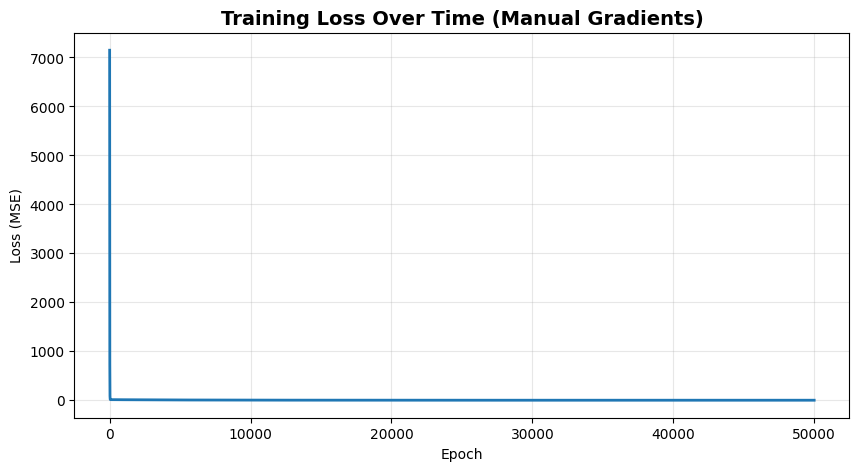


Final Loss: 1.3113


In [39]:
# --- Step 4: Visualize the training progress ---

plt.figure(figsize=(10, 5))
plt.plot(loss_history, linewidth=2)
plt.title("Training Loss Over Time (Manual Gradients)", fontsize=14, fontweight='bold')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.grid(alpha=0.3)
plt.show()

print(f"\nFinal Loss: {loss_history[-1]:.4f}")

LEARNED PARAMETERS (Manual Gradients)
w₁ (Hours Studied): 2.4205
w₂ (Hours Slept):   2.5870
b  (Bias):          53.9883

Predictions vs Actual:
----------------------------------------
Sample 1: Predicted = 74.35, Actual = 75.00
Sample 2: Predicted = 81.78, Actual = 80.00
Sample 3: Predicted = 89.21, Actual = 90.00
Sample 4: Predicted = 92.75, Actual = 94.00
Sample 5: Predicted = 98.89, Actual = 98.00


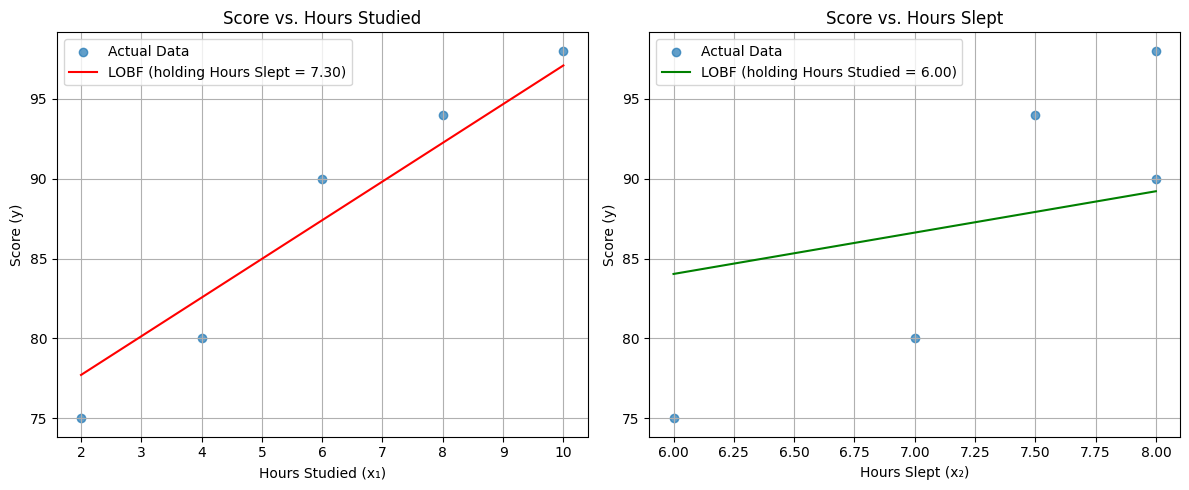

In [42]:
# --- Step 5: Display learned parameters ---

# =====================================
# PRINT TRAINED PARAMETERS
# =====================================
print("=" * 50)
print("LEARNED PARAMETERS (Manual Gradients)")
print("=" * 50)
print(f"w₁ (Hours Studied): {w[0].item():.4f}")
print(f"w₂ (Hours Slept):   {w[1].item():.4f}")
print(f"b  (Bias):          {b.item():.4f}")
print("=" * 50)

# =====================================
# MAKE PREDICTIONS
# =====================================
final_predictions = x @ w + b

print("\nPredictions vs Actual:")
print("-" * 40)
for i in range(len(x)):
    print(f"Sample {i+1}: Predicted = {final_predictions[i].item():.2f}, Actual = {y[i].item():.2f}")

# =====================================
# PREPARE DATA FOR PLOTTING
# =====================================
# Convert tensors to numpy arrays if needed
x_np = x.detach().numpy()
y_np = y.detach().numpy()

x1_data = x_np[:, 0]  # Hours Studied
x2_data = x_np[:, 1]  # Hours Slept

# Extract learned weights
w1_final = w[0].item()
w2_final = w[1].item()
b_final  = b.item()

# Compute means
x1_mean = x1_data.mean()
x2_mean = x2_data.mean()

# =====================================
# PLOT 1: Hours Studied vs Score (Hold Hours Slept constant)
# =====================================
x1_line = np.linspace(x1_data.min(), x1_data.max(), 100)
y_line_1 = (w1_final * x1_line) + (w2_final * x2_mean) + b_final

# =====================================
# PLOT 2: Hours Slept vs Score (Hold Hours Studied constant)
# =====================================
x2_line = np.linspace(x2_data.min(), x2_data.max(), 100)
y_line_2 = (w1_final * x1_mean) + (w2_final * x2_line) + b_final

# =====================================
# VISUALIZATION
# =====================================
plt.figure(figsize=(12, 5))

# Subplot 1
plt.subplot(1, 2, 1)
plt.scatter(x1_data, y_np, alpha=0.7, label='Actual Data')
plt.plot(x1_line, y_line_1, 'r-', label=f'LOBF (holding Hours Slept = {x2_mean:.2f})')
plt.title('Score vs. Hours Studied')
plt.xlabel('Hours Studied (x₁)')
plt.ylabel('Score (y)')
plt.legend()
plt.grid(True)

# Subplot 2
plt.subplot(1, 2, 2)
plt.scatter(x2_data, y_np, alpha=0.7, label='Actual Data')
plt.plot(x2_line, y_line_2, 'g-', label=f'LOBF (holding Hours Studied = {x1_mean:.2f})')
plt.title('Score vs. Hours Slept')
plt.xlabel('Hours Slept (x₂)')
plt.ylabel('Score (y)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

---

### **9. Linear Regression with PyTorch (Auto Grad)**

In the previous section, we manually calculated gradients using the formulas we derived. But imagine if we had:
- **Hundreds of parameters** instead of just 3
- **Complex neural networks** with multiple layers
- **Different activation functions** and architectures

Manually computing gradients would become extremely tedious and error-prone! 😰

This is where **PyTorch's Autograd** (Automatic Differentiation) comes to the rescue! 🎉

**Autograd** automatically computes gradients for us by:
1. Tracking all operations on tensors that have `requires_grad=True`
2. Building a computational graph in the background
3. Using the chain rule to compute gradients automatically when we call `.backward()`

Let's implement the **exact same** linear regression model, but this time letting PyTorch handle all the gradient calculations!

In [43]:
# --- Step 1: Initialize parameters with requires_grad=True ---

torch.manual_seed(42)  # Same seed for fair comparison
w_auto = torch.randn(2, 1, dtype=torch.float32, requires_grad=True)
b_auto = torch.randn(1, dtype=torch.float32, requires_grad=True)

print("Initial parameters (with autograd enabled):")
print(f"Weights:\n{w_auto}")
print(f"Bias: {b_auto.item():.4f}")
print(f"\nrequires_grad = {w_auto.requires_grad}")  # Should be True!

Initial parameters (with autograd enabled):
Weights:
tensor([[0.3367],
        [0.1288]], requires_grad=True)
Bias: 0.2345

requires_grad = True


In [44]:
# --- Step 2: Gradient Descent with Autograd ---

learning_rate = 0.01
epochs = 50000

loss_history_auto = []

for epoch in range(epochs):
    # Forward pass
    y_pred = x @ w_auto + b_auto

    # Compute loss
    loss = torch.mean((y_pred - y) ** 2)
    loss_history_auto.append(loss.item())

    # 🎯 THE MAGIC: Compute gradients automatically!
    loss.backward()  # This computes dL/dw and dL/db for us!

    # Update parameters (we need to disable gradient tracking for this update)
    with torch.no_grad():
        w_auto -= learning_rate * w_auto.grad
        b_auto -= learning_rate * b_auto.grad

        # Zero out gradients for next iteration
        w_auto.grad.zero_()
        b_auto.grad.zero_()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

print("\n✅ Training complete with Autograd!")

Epoch [100/50000], Loss: 13.0263
Epoch [200/50000], Loss: 12.8324
Epoch [300/50000], Loss: 12.6423
Epoch [400/50000], Loss: 12.4553
Epoch [500/50000], Loss: 12.2714
Epoch [600/50000], Loss: 12.0906
Epoch [700/50000], Loss: 11.9127
Epoch [800/50000], Loss: 11.7378
Epoch [900/50000], Loss: 11.5657
Epoch [1000/50000], Loss: 11.3965
Epoch [1100/50000], Loss: 11.2301
Epoch [1200/50000], Loss: 11.0664
Epoch [1300/50000], Loss: 10.9054
Epoch [1400/50000], Loss: 10.7471
Epoch [1500/50000], Loss: 10.5914
Epoch [1600/50000], Loss: 10.4383
Epoch [1700/50000], Loss: 10.2876
Epoch [1800/50000], Loss: 10.1395
Epoch [1900/50000], Loss: 9.9938
Epoch [2000/50000], Loss: 9.8505
Epoch [2100/50000], Loss: 9.7096
Epoch [2200/50000], Loss: 9.5710
Epoch [2300/50000], Loss: 9.4347
Epoch [2400/50000], Loss: 9.3007
Epoch [2500/50000], Loss: 9.1688
Epoch [2600/50000], Loss: 9.0391
Epoch [2700/50000], Loss: 8.9116
Epoch [2800/50000], Loss: 8.7862
Epoch [2900/50000], Loss: 8.6628
Epoch [3000/50000], Loss: 8.5415
E

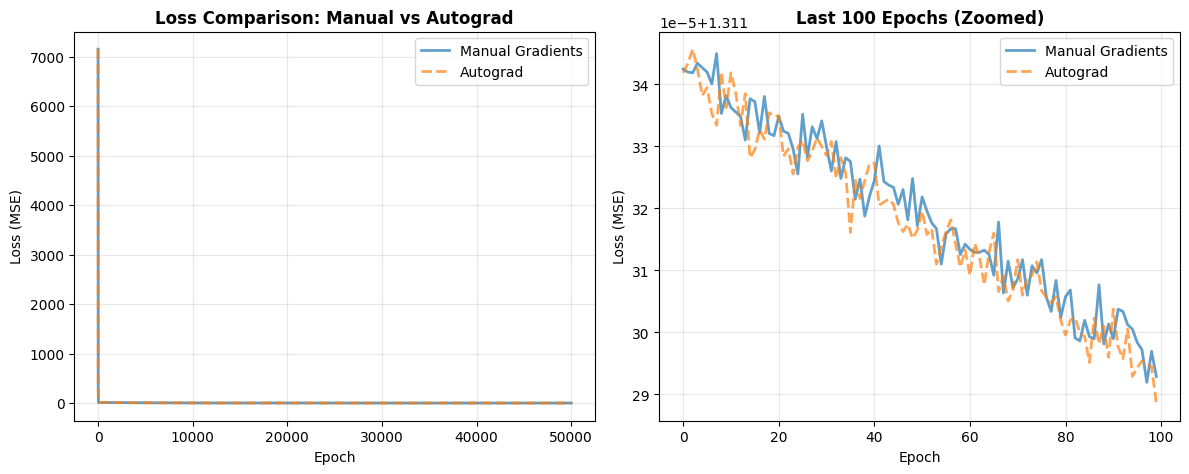

In [45]:
# --- Step 3: Compare Manual vs Autograd ---

plt.figure(figsize=(12, 5))

# Plot 1: Loss comparison
plt.subplot(1, 2, 1)
plt.plot(loss_history, label='Manual Gradients', linewidth=2, alpha=0.7)
plt.plot(loss_history_auto, label='Autograd', linewidth=2, linestyle='--', alpha=0.7)
plt.title("Loss Comparison: Manual vs Autograd", fontsize=12, fontweight='bold')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Zoomed view of final epochs
plt.subplot(1, 2, 2)
plt.plot(loss_history[-100:], label='Manual Gradients', linewidth=2, alpha=0.7)
plt.plot(loss_history_auto[-100:], label='Autograd', linewidth=2, linestyle='--', alpha=0.7)
plt.title("Last 100 Epochs (Zoomed)", fontsize=12, fontweight='bold')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [46]:
# --- Step 4: Display learned parameters from Autograd ---

print("=" * 50)
print("LEARNED PARAMETERS (Autograd)")
print("=" * 50)
print(f"w₁ (Hours Studied): {w_auto[0].item():.4f}")
print(f"w₂ (Hours Slept):   {w_auto[1].item():.4f}")
print(f"b  (Bias):          {b_auto.item():.4f}")
print("=" * 50)

# Compare with manual gradients
print("\n📊 COMPARISON:")
print("-" * 50)
print(f"Difference in w₁: {abs(w[0].item() - w_auto[0].item()):.6f}")
print(f"Difference in w₂: {abs(w[1].item() - w_auto[1].item()):.6f}")
print(f"Difference in b:  {abs(b.item() - b_auto.item()):.6f}")
print(f"Difference in final loss: {abs(loss_history[-1] - loss_history_auto[-1]):.6f}")
print("-" * 50)
print("\n✨ Both methods produce virtually identical results!")

LEARNED PARAMETERS (Autograd)
w₁ (Hours Studied): 2.4205
w₂ (Hours Slept):   2.5870
b  (Bias):          53.9884

📊 COMPARISON:
--------------------------------------------------
Difference in w₁: 0.000003
Difference in w₂: 0.000016
Difference in b:  0.000099
Difference in final loss: 0.000004
--------------------------------------------------

✨ Both methods produce virtually identical results!


**Key Takeaways from Autograd:**

1. **Simplicity**: Just call `.backward()` instead of deriving and coding gradient formulas
2. **Accuracy**: PyTorch handles the math perfectly, no chance for manual errors
3. **Flexibility**: Works with any computation, no matter how complex
4. **Same Results**: Autograd gives us the exact same parameters as manual gradients!

**The workflow:**
```python
# 1. Enable gradient tracking
w = torch.tensor([...], requires_grad=True)

# 2. Forward pass
loss = compute_loss(...)

# 3. Backward pass (compute gradients)
loss.backward()

# 4. Access gradients
print(w.grad)  # Gradient is stored here!

# 5. Update parameters & zero gradients
w.data -= learning_rate * w.grad
w.grad.zero_()
```

This is the foundation of all deep learning in PyTorch! 🚀

---

### **10. Final Results**

Let's visualize our final model and see how well it fits the data!

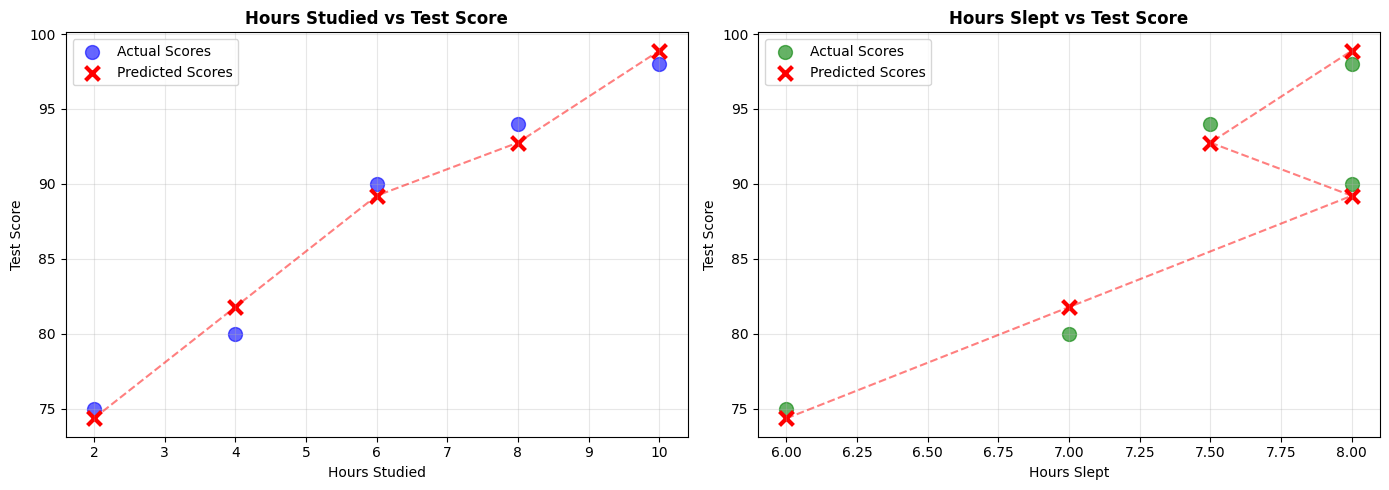

In [47]:
# --- Step 1: Final predictions with our trained model ---

with torch.no_grad():
    final_predictions = x @ w_auto + b_auto

# Convert to numpy for easier plotting
x_np = x.numpy()
y_np = y.numpy()
pred_np = final_predictions.numpy()

# Create visualization
fig = plt.figure(figsize=(14, 5))

# Plot 1: Hours Studied vs Test Score
plt.subplot(1, 2, 1)
plt.scatter(x_np[:, 0], y_np, color='blue', s=100, alpha=0.6, label='Actual Scores')
plt.scatter(x_np[:, 0], pred_np, color='red', s=100, marker='x', linewidths=3, label='Predicted Scores')
plt.plot(x_np[:, 0], pred_np, color='red', linestyle='--', alpha=0.5)
plt.title("Hours Studied vs Test Score", fontsize=12, fontweight='bold')
plt.xlabel("Hours Studied")
plt.ylabel("Test Score")
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Hours Slept vs Test Score
plt.subplot(1, 2, 2)
plt.scatter(x_np[:, 1], y_np, color='green', s=100, alpha=0.6, label='Actual Scores')
plt.scatter(x_np[:, 1], pred_np, color='red', s=100, marker='x', linewidths=3, label='Predicted Scores')
plt.plot(x_np[:, 1], pred_np, color='red', linestyle='--', alpha=0.5)
plt.title("Hours Slept vs Test Score", fontsize=12, fontweight='bold')
plt.xlabel("Hours Slept")
plt.ylabel("Test Score")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [48]:
# --- Step 2: Display the final model equation ---

w1_final = w_auto[0].item()
w2_final = w_auto[1].item()
b_final = b_auto.item()

print("=" * 70)
print("🎓 FINAL LINEAR REGRESSION MODEL")
print("=" * 70)
print(f"\nTest Score = {w1_final:.4f} × Hours Studied + {w2_final:.4f} × Hours Slept + {b_final:.4f}")
print("\n" + "=" * 70)
print("\n📊 DETAILED PREDICTIONS:")
print("-" * 70)
print(f"{'Hours Studied':<15} {'Hours Slept':<15} {'Actual':<12} {'Predicted':<12} {'Error':<10}")
print("-" * 70)

for i in range(len(X)):
    hours_studied = x_np[i, 0]
    hours_slept = x_np[i, 1]
    actual = y_np[i, 0]
    predicted = pred_np[i, 0]
    error = abs(actual - predicted)
    print(f"{hours_studied:<15.1f} {hours_slept:<15.1f} {actual:<12.1f} {predicted:<12.2f} {error:<10.2f}")

print("-" * 70)
print(f"Mean Absolute Error: {np.mean(np.abs(y_np - pred_np)):.2f}")
print(f"Final MSE Loss: {loss_history_auto[-1]:.4f}")
print("=" * 70)

🎓 FINAL LINEAR REGRESSION MODEL

Test Score = 2.4205 × Hours Studied + 2.5870 × Hours Slept + 53.9884


📊 DETAILED PREDICTIONS:
----------------------------------------------------------------------
Hours Studied   Hours Slept     Actual       Predicted    Error     
----------------------------------------------------------------------
2.0             6.0             75.0         74.35        0.65      
4.0             7.0             80.0         81.78        1.78      
6.0             8.0             90.0         89.21        0.79      
8.0             7.5             94.0         92.75        1.25      
10.0            8.0             98.0         98.89        0.89      
----------------------------------------------------------------------
Mean Absolute Error: 1.07
Final MSE Loss: 1.3113


In [49]:
# --- Step 3: Make predictions for new students! ---

print("\n🔮 PREDICTIONS FOR NEW STUDENTS:")
print("=" * 70)

# New student data
new_students = [
    [3, 6.5],   # 3 hours studied, 6.5 hours slept
    [7, 8],     # 7 hours studied, 8 hours slept
    [5, 7],     # 5 hours studied, 7 hours slept
]

new_X = torch.tensor(new_students, dtype=torch.float32)

with torch.no_grad():
    new_predictions = new_X @ w_auto + b_auto

print(f"{'Hours Studied':<15} {'Hours Slept':<15} {'Predicted Score':<20}")
print("-" * 70)
for i, (student, pred) in enumerate(zip(new_students, new_predictions)):
    print(f"{student[0]:<15.1f} {student[1]:<15.1f} {pred.item():<20.2f}")
print("=" * 70)


🔮 PREDICTIONS FOR NEW STUDENTS:
Hours Studied   Hours Slept     Predicted Score     
----------------------------------------------------------------------
3.0             6.5             78.07               
7.0             8.0             91.63               
5.0             7.0             84.20               


---

### **Conclusion: What We Learned**

Congratulations! You've just built a complete linear regression model from scratch using PyTorch! 🎉

**Key Concepts Covered:**

1. **Linear Regression Basics**
   - Modeling relationships between inputs and outputs
   - Understanding weights, bias, and predictions

2. **Loss Functions**
   - Mean Squared Error (MSE) to measure prediction quality
   - The goal: minimize loss to improve our model

3. **Calculus & Gradients**
   - Derivatives tell us how to improve parameters
   - Chain rule for computing gradients
   - Partial derivatives for multi-variable optimization

4. **Gradient Descent Algorithm**
   - Iteratively updating parameters to minimize loss
   - Learning rate controls step size
   - Forward pass → compute loss → compute gradients → update parameters

5. **Manual Implementation**
   - Coded gradient formulas ourselves
   - Understood the math behind the optimization

6. **PyTorch Autograd**
   - Automatic differentiation eliminates manual gradient coding
   - `.backward()` does the calculus for us
   - Same results with less code and no errors!

**What's Next?**

This simple linear regression is the foundation for:
- **Deep Neural Networks** (stack multiple layers)
- **Convolutional Neural Networks** (for images)
- **Recurrent Neural Networks** (for sequences)
- **Transformers** (for language models like GPT)

The principles remain the same:
1. Define a model
2. Define a loss function
3. Use gradients to optimize
4. Let autograd handle the calculus!

---

**You now understand the core of deep learning!** 🚀

Every complex neural network is just this same process scaled up with more layers, parameters, and data. The mathematics of gradient descent and backpropagation powers everything from ChatGPT to self-driving cars!

Keep exploring, and happy learning! 📚✨